# Analyse Speed Dating : Nettoyage et Analyse Exploratoire
## Présentation du projet

- Analyse de données issues d’expériences de speed dating menées entre 2002 et 2004.
- Chaque ligne du jeu de données correspond à une rencontre entre deux participants.
- Les participants indiquent s’ils souhaitent ou non se revoir après le rendez-vous.
- Les partenaires sont évalués selon plusieurs attributs clés (attractivité, sincérité, intelligence, amusement, ambition, intérêts partagés).
- L’objectif est d’identifier les facteurs influençant l’obtention d’un second rendez-vous.
- L’analyse repose sur des statistiques descriptives et des visualisations, dans un contexte proche de celui des applications de rencontre comme Tinder.

## Nettoyage du jeu de données

Cette section présente les principales étapes de nettoyage des données afin de préparer le jeu de données à l’analyse exploratoire (EDA).

### Importation des librairies et de la data

In [1]:
import pandas as pd
import numpy as np

df_raw = pd.read_csv("../data/Speed+Dating+Data.csv", encoding='cp1252')

pd.set_option("display.max_columns", None)

### Inspection initiale

In [2]:
print("Aperçu des données :")
display(df_raw.head(2))

print("\nInformations générales :")
df_raw.info()

print("\nRésumé statistique :")
display(df_raw.describe(include='all'))

print(f"\nD. Dimensions du DataFrame : {df_raw.shape[0]} lignes et {df_raw.shape[1]} colonnes")

Aperçu des données :


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN



Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB

Résumé statistique :


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


D. Dimensions du DataFrame : 8378 lignes et 195 colonnes


### Nettoyage des noms de colonnes

In [3]:
df_raw.columns = (
    df_raw.columns
    .str.strip()               # Supprimer les espaces
    .str.lower()               # Mettre en minuscules
    .str.replace(' ', '_')     # Remplacer les espaces par _
    .str.replace('[^0-9a-zA-Z_]', '', regex=True)  # Supprimer les caractères spéciaux
)

### Renommage des colonnes ambigues

In [4]:
df_raw = df_raw.rename(columns={"id": "id_wave"})

### Création des listes de colonnes

Par souci de simplicité et de clarté, nous conservons un seul DataFrame principal tout au long de l’analyse.

Des listes de colonnes ont néanmoins été définies afin de structurer le jeu de données et d’identifier les principaux groupes de variables (participants, décisions, évaluations, préférences).

Elles ne sont pas utilisées dans cette phase exploratoire, mais constituent une base réutilisable pour des analyses ultérieures ou une éventuelle phase de modélisation.

In [5]:
cols_participants = ["iid", "wave", "id_wave", "gender", "age", "race", "field", "order"]

cols_decisions = ["iid", "partner", "pid", "dec", "dec_o", "match", "like", "prob", "samerace"]

cols_notes_partenaire = ["iid", "partner", "attr", "sinc", "intel", "fun", "amb", "shar"]

cols_preferences = ["iid", "wave", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]

### Mapping des variables catégorielles

Les variables catégorielles utilisées dans l’analyse ont été mappées vers des libellés explicites afin d’améliorer la lisibilité des visualisations.


In [6]:
gender_dict = {0: "Female", 1: "Male"}
df_raw["gender"] = df_raw["gender"].map(gender_dict)
df_raw["gender"] = df_raw["gender"].astype("category")


In [7]:
race_dict = {
    1: "Black/African American",
    2: "European/Caucasian-American",
    3: "Latino/Hispanic American",
    4: "Asian/Pacific Islander/Asian-American",
    5: "Native American",
    6: "Other"
}
df_raw["race"] = df_raw["race"].map(race_dict)
df_raw["race"] = df_raw["race"].astype("category")

In [8]:
goal_dict = {
    1: "Fun night out",
    2: "Meet new people",
    3: "Get a date",
    4: "Serious relationship",
    5: "Just to try",
    6: "Other"
}
df_raw["goal"] = df_raw["goal"].map(goal_dict)

In [9]:
frequence_dict = {
    1: "Several times a week",
    2: "Twice a week",
    3: "Once a week",
    4: "Twice a month",
    5: "Once a month",
    6: "Several times a year",
    7: "Almost never"
}
df_raw["date"] = df_raw["date"].map(frequence_dict)
df_raw["go_out"] = df_raw["go_out"].map(frequence_dict)

### Gestion et analyse du pourcentage des valeurs manquantes

In [10]:
print("\nValeurs manquantes :")
display(df_raw.isna().sum())

missing_percentage = df_raw.isna().sum() / len(df_raw) * 100
print("\nPourcentage de valeurs manquantes par colonne :")
display(missing_percentage.sort_values(ascending=False))


Valeurs manquantes :


iid            0
id_wave        1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64


Pourcentage de valeurs manquantes par colonne :


num_in_3    92.026737
numdat_3    82.143710
expnum      78.515159
sinc7_2     76.665075
amb7_2      76.665075
              ...    
gender       0.000000
round        0.000000
position     0.000000
match        0.000000
dec          0.000000
Length: 195, dtype: float64

### Vérification et gestion des doublons

In [11]:
nb_doublons = df_raw.duplicated().sum()
print(f"\nDoublons détectés : {nb_doublons}")


Doublons détectés : 0


### Vérification et correction des types

In [12]:
print("\nTypes des variables :")
display(df_raw.dtypes)


Types des variables :


iid            int64
id_wave      float64
gender      category
idg            int64
condtn         int64
              ...   
attr5_3      float64
sinc5_3      float64
intel5_3     float64
fun5_3       float64
amb5_3       float64
Length: 195, dtype: object

### Vérification des bornes des variables clés

In [13]:
df_raw[["attr", "sinc", "intel", "fun", "amb", "shar"]].describe()

,attr,sinc,intel,fun,amb,shar
count,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000
mean,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559
std,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000
50%,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Vérifier la cohérence d'une variable

La répartition des valeurs de la variable match est analysée afin de s’assurer qu’elle couvre bien 100 % du jeu de données.

In [14]:
df_raw["match"].value_counts(normalize=True)


match
0    0.835283
1    0.164717
Name: proportion, dtype: float64

### Création df_clean

Les vagues 6 à 9 ont été exclues de l’analyse, car les échelles de notation utilisées diffèrent des vagues précédentes, ce qui rend les comparaisons directes non pertinentes.


In [15]:
df_clean = df_raw[(df_raw["wave"] < 6) | (df_raw["wave"] > 9)].copy()


Vérification des vagues restantes après filtrage

In [16]:
df_clean["wave"].value_counts().sort_index()

wave
1     200
2     608
3     200
4     648
5     190
10    162
11    882
12    392
13    180
14    720
15    684
16     96
17    280
18     72
19    450
20     84
21    968
Name: count, dtype: int64

### Création df_individus

Le jeu de données étant structuré par rencontre, certaines analyses descriptives sont réalisées au niveau des individus afin d’éviter de surreprésenter les participants ayant effectué un nombre plus élevé de rendez-vous.

In [17]:
df_individus = df_clean.drop_duplicates(subset=["iid"])

In [18]:
df_individus["gender"].value_counts()

gender
Male      226
Female    223
Name: count, dtype: int64

## Analyse exploratoire des données (EDA)

Cette section présente une analyse exploratoire des données à l’aide de statistiques descriptives et de visualisations.

### Importation des librairies

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

### Panel étudié

#### Distribution de l'âge

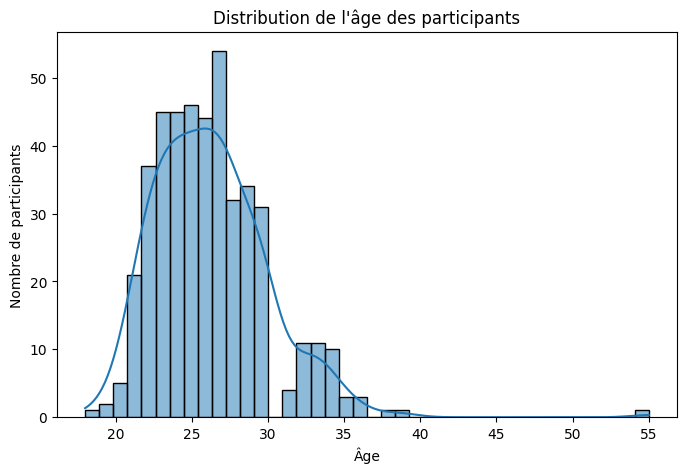

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df_individus["age"].dropna(), bins=40, kde=True)
plt.title("Distribution de l'âge des participants")
plt.xlabel("Âge")
plt.ylabel("Nombre de participants")
plt.show()

#### Répartition des participants par genre

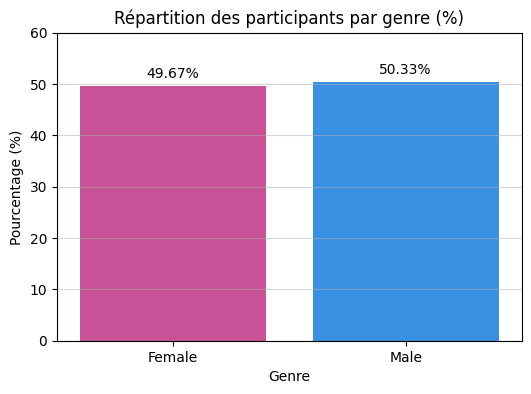

In [21]:
# Ordre explicite
gender_order = ["Female", "Male"]

# Calcul des pourcentages
counts = df_individus["gender"].value_counts()
percent = (counts / counts.sum() * 100).round(2)

plot_df = pd.DataFrame({
    "gender": gender_order,
    "percentage": [percent.get(g, 0) for g in gender_order]
})

# Création du graphique
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=plot_df,
    x="gender",
    y="percentage",
    order=gender_order,
    hue="gender", 
    palette=["#DB3E9A", "#1E90FF"]
)

plt.title("Répartition des participants par genre (%)")
plt.xlabel("Genre")
plt.ylabel("Pourcentage (%)")

## Ajout des annotions au-dessus des barres
for bar, (_, row) in zip(ax.patches, plot_df.iterrows()):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f'{row["percentage"]}%',
        ha="center",
        va="bottom"
    )

plt.ylim(0, 60)
plt.grid(axis="y", alpha=0.5)
plt.show()


#### Les origines représentées

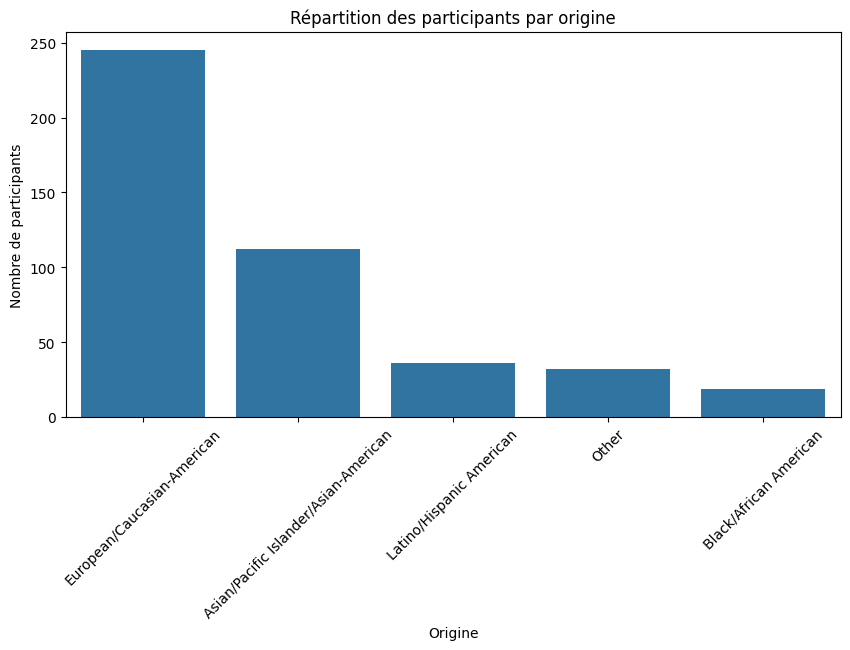

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df_individus,
    x="race",
    order=df_individus["race"].value_counts().index
)
plt.title("Répartition des participants par origine")
plt.xlabel("Origine")
plt.ylabel("Nombre de participants")
plt.xticks(rotation=45)
plt.show()

#### Fréquence des rendez-vous et des sorties

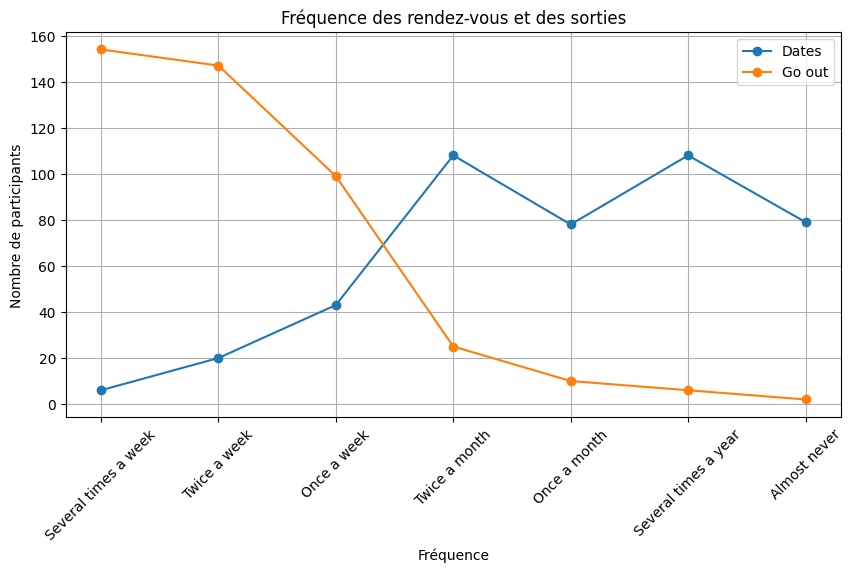

In [23]:
# Définition de l'ordre logique de l'axe X
frequence_order = list(frequence_dict.values())

# Comptage
date_count = (df_individus["date"].value_counts().reindex(frequence_order))
go_out_count = (df_individus["go_out"].value_counts().reindex(frequence_order))

# Création du graphique
plt.figure(figsize=(10, 5))
plt.plot(frequence_order, date_count, marker="o", label="Dates")
plt.plot(frequence_order, go_out_count, marker="o", label="Go out")

plt.xlabel("Fréquence")
plt.ylabel("Nombre de participants")
plt.title("Fréquence des rendez-vous et des sorties")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#### Conclusion

L’analyse exploratoire montre que l’échantillon est majoritairement composé de jeunes adultes (20–30 ans), avec une distribution d’âge légèrement asymétrique due à quelques participants plus âgés.

La répartition par genre est équilibrée, ce qui limite les biais liés au sexe.

En revanche, les origines ne sont pas uniformément représentées, avec une majorité de participants European/Caucasian-American.

Enfin, les sorties sociales sont plus fréquentes que les rendez-vous amoureux, ces derniers ayant tendance à être plus occasionnels.

### Différences selon les genres

#### Préférences déclarées selon le genre

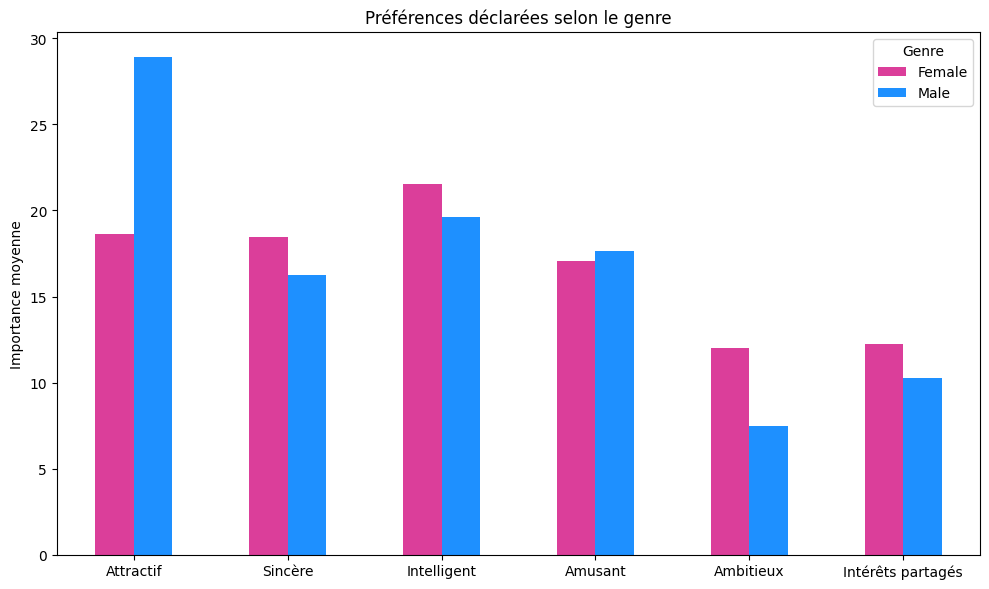

In [24]:
# Définition des variables correspondant aux préférences déclarées
criteres = ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
labels = ["Attractif", "Sincère", "Intelligent", "Amusant", "Ambitieux", "Intérêts partagés"]

# Calcul des préférences moyennes par genre
df_pref = df_clean[["gender"] + criteres].dropna()

df_pref_mean = df_pref.groupby("gender", observed=True)[criteres].mean().T
df_pref_mean.index = labels

# Création du graphique
df_pref_mean.plot(
    kind="bar",
    figsize=(10, 6),
    color=["#DB3E9A", "#1E90FF"]
)

plt.title("Préférences déclarées selon le genre")
plt.ylabel("Importance moyenne")
plt.xticks(rotation=0)
plt.legend(title="Genre")
plt.tight_layout()
plt.show()


#### Perception des critères valorisés par les autres (au sein de son genre)

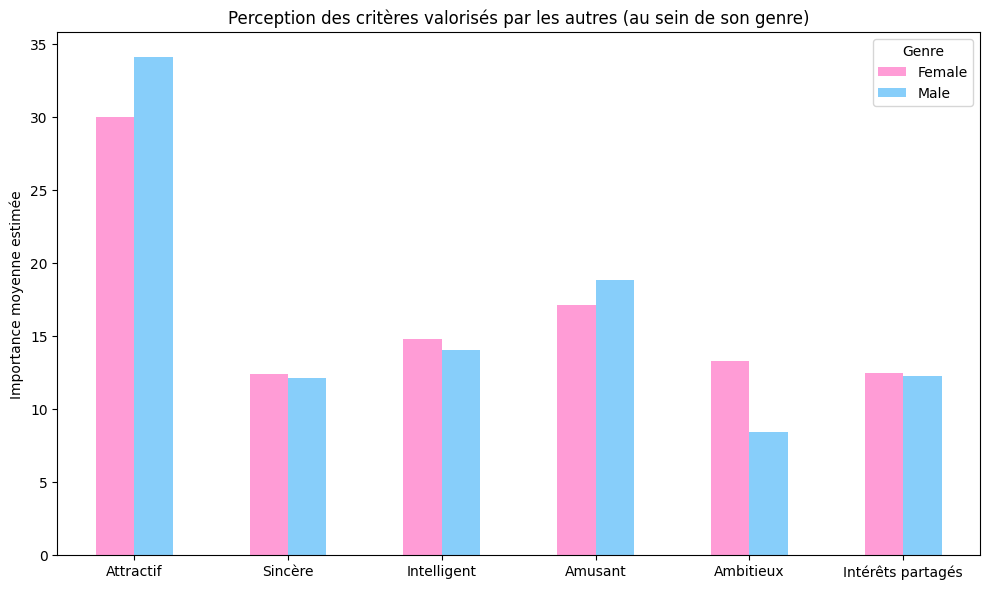

In [25]:
# Définition des variables correspondant aux préférences perçues
criteres_perception = ["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]

# Calcul des préférences moyennes par genre
df_perc = df_clean[["gender"] + criteres_perception].dropna()

df_perc_mean = df_perc.groupby("gender", observed=True)[criteres_perception].mean().T
df_perc_mean.index = labels

# Création du graphique
df_perc_mean.plot(
    kind="bar",
    figsize=(10, 6),
    color=["#FF9CD6", "#87CEFA"]
)

plt.title("Perception des critères valorisés par les autres (au sein de son genre)")
plt.ylabel("Importance moyenne estimée")
plt.xticks(rotation=0)
plt.legend(title="Genre")
plt.tight_layout()
plt.show()


#### Décalage entre préférences réelles et perçues — Hommes

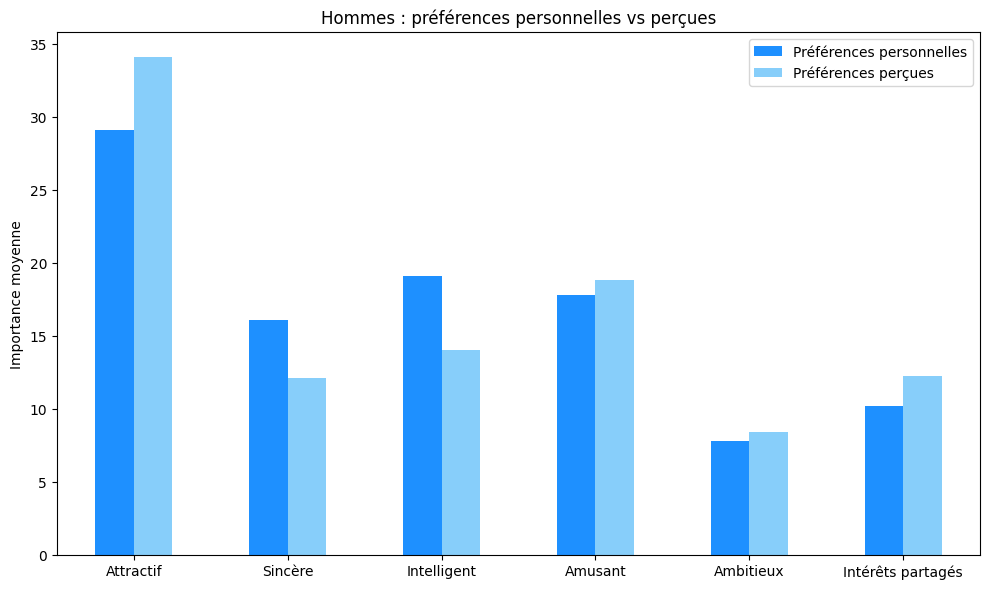

In [26]:
# Calcul des moyennes uniquement pour les participants masculins
df_hommes = df_clean[df_clean["gender"] == "Male"][criteres + criteres_perception].dropna()

hommes_comp = pd.DataFrame({
    "Préférences personnelles": df_hommes[criteres].mean().values,
    "Préférences perçues": df_hommes[criteres_perception].mean().values
}, index=labels)

# Création du graphique
hommes_comp.plot(
    kind="bar",
    figsize=(10, 6),
    color=["#1E90FF", "#87CEFA"]
)

plt.title("Hommes : préférences personnelles vs perçues")
plt.ylabel("Importance moyenne")
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


#### Décalage entre préférences réelles et perçues — Femmes

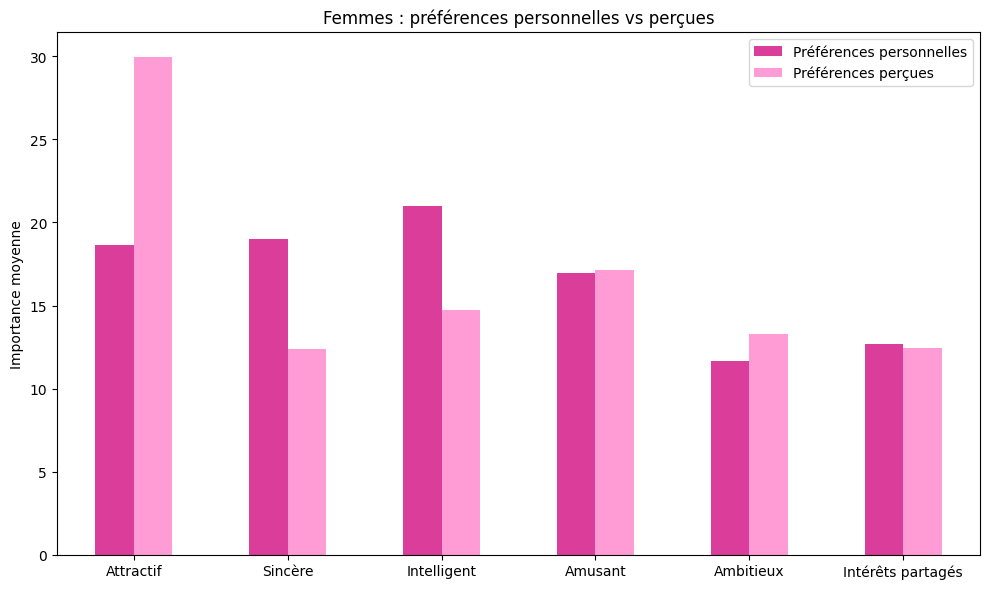

In [27]:
# Calcul des moyennes uniquement pour les participantes féminines
df_femmes = df_clean[df_clean["gender"] == "Female"][criteres + criteres_perception].dropna()

femmes_comp = pd.DataFrame({
    "Préférences personnelles": df_femmes[criteres].mean().values,
    "Préférences perçues": df_femmes[criteres_perception].mean().values
}, index=labels)

# Création du graphique
femmes_comp.plot(
    kind="bar",
    figsize=(10, 6),
    color=["#DB3E9A", "#FF9CD6"]
)

plt.title("Femmes : préférences personnelles vs perçues")
plt.ylabel("Importance moyenne")
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


#### Sélectivité pour accepter un second rendez-vous

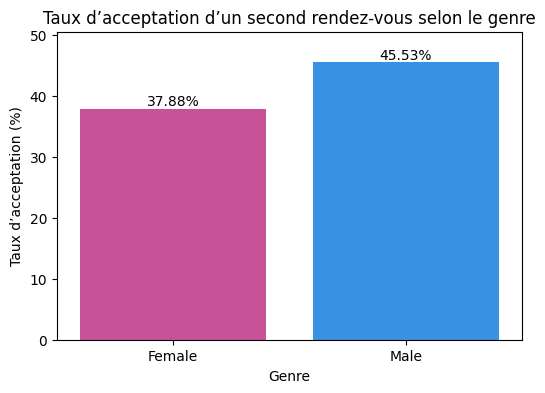

In [28]:
# Calcul du taux moyen d’acceptation d’un second rendez-vous par genre
dec_gender = (
    df_clean
    .groupby("gender", observed=True)["dec"]
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)
dec_gender.columns = ["gender", "decision_rate"]

# Création du graphique
plt.figure(figsize=(6, 4))
sns.barplot(data=dec_gender, x="gender", y="decision_rate", hue="gender", palette=["#DB3E9A", "#1E90FF"])
plt.title("Taux d’acceptation d’un second rendez-vous selon le genre")
plt.xlabel("Genre")
plt.ylabel("Taux d’acceptation (%)")

## Ajout des annotions au-dessus des barres
for i, row in dec_gender.iterrows():
    plt.text(i, row["decision_rate"] + 0.5, f'{row["decision_rate"]}%', ha="center")

plt.ylim(0, dec_gender["decision_rate"].max() + 5)
plt.show()


#### Conclusion

L’analyse met en évidence des différences de préférences selon le genre, les hommes accordant davantage d’importance à l’attractivité, tandis que les femmes valorisent davantage des critères tels que l’intelligence et la sincérité.


Un décalage apparaît également entre les préférences réelles et celles perçues comme étant attendues par les autres, les participants ayant tendance à surestimer l’importance de l’apparence au détriment de critères plus relationnels.


Enfin, les hommes acceptent plus fréquemment un second rendez-vous que les femmes, traduisant une sélectivité plus élevée chez ces dernières.

### Différences selon les origines ethniques

#### Taux de match par origines ethniques

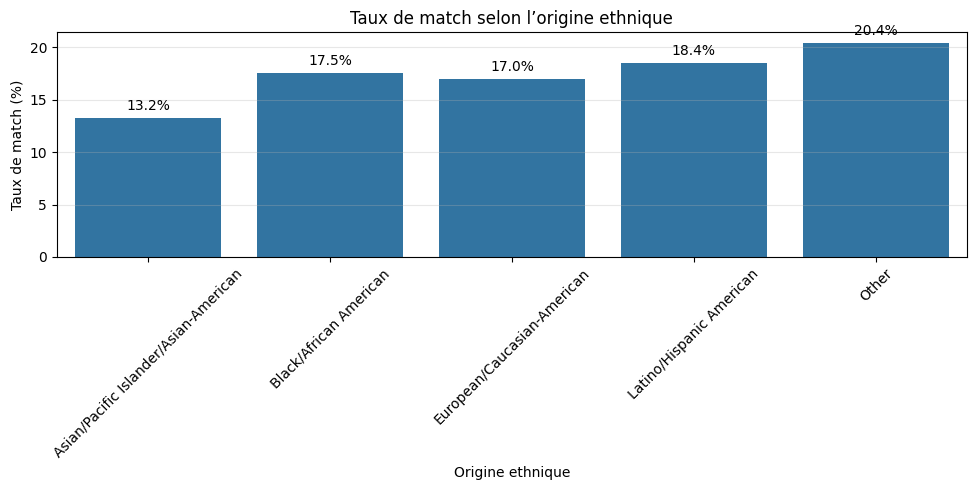

In [29]:
# Calcul du taux de match par origine ethnique
match_by_race = (
    df_clean
    .groupby("race", observed=True)["match"]
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

# Création du graphique
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=match_by_race,
    x="race",
    y="match"
)

plt.title("Taux de match selon l’origine ethnique")
plt.xlabel("Origine ethnique")
plt.ylabel("Taux de match (%)")
plt.xticks(rotation=45)

## Ajout des annotions au-dessus des barres
for bar in ax.patches:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + 0.5,
        f"{h:.1f}%",
        ha="center",
        va="bottom"
    )

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


#### Taux de match si origine commune

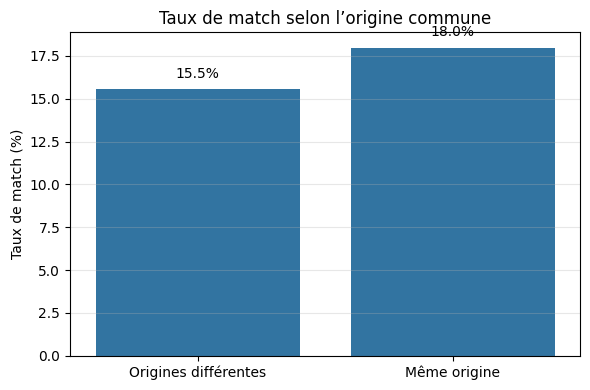

In [30]:
# Calcul du taux de match selon origine commune
match_by_samerace = (
    df_clean
    .groupby("samerace", observed=True)["match"]
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

match_by_samerace["samerace_label"] = match_by_samerace["samerace"].map({
    0: "Origines différentes",
    1: "Même origine"
})

# Création du graphique
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=match_by_samerace,
    x="samerace_label",
    y="match"
)

plt.title("Taux de match selon l’origine commune")
plt.xlabel("")
plt.ylabel("Taux de match (%)")

## Ajout des annotions au-dessus des barres
for bar in ax.patches:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + 0.5,
        f"{h:.1f}%",
        ha="center",
        va="bottom"
    )

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [31]:
# Proportion de matchs inter-origines
inter_race_match = (
    df_clean[df_clean["match"] == 1]["samerace"]
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)

inter_race_match


samerace
0    57.47
1    42.53
Name: proportion, dtype: float64

#### Conclusion

Le partage d’une même origine ethnique augmente légèrement la probabilité de match, avec un taux plus élevé lorsque les deux participants sont de même origine que lorsqu’ils sont d’origines différentes.

Cependant, une part importante des matchs reste inter-origines, montrant que l’origine commune n’est pas un facteur déterminant majeur.

Les écarts de taux de match entre origines existent mais restent modérés, suggérant que d’autres critères relationnels jouent un rôle plus important dans la décision finale.

### Focus sur les matchs uniquement

In [32]:
# Création du DataFrame contenant uniquement les rencontres ayant abouti à un match
df_match = df_clean[df_clean["match"] == 1]

#### Attributs les mieux évalués lors des matchs

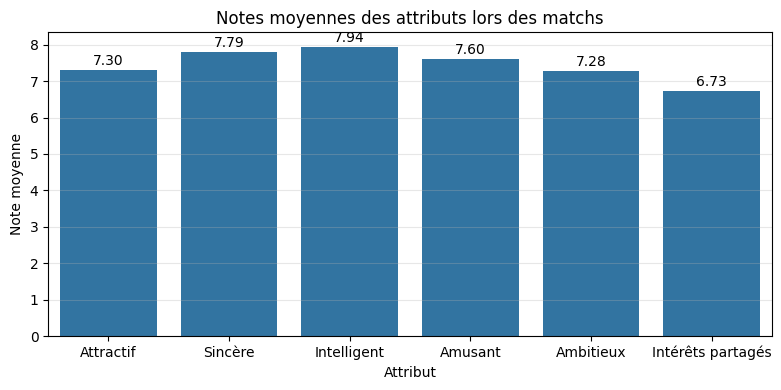

In [33]:
# Sélection des attributs évalués après la rencontre
notes_cols = ["attr", "sinc", "intel", "fun", "amb", "shar"]

# Calcul des notes moyennes
notes_match_mean = (
    df_match[notes_cols]
    .mean()
    .round(2)
    .reset_index()
)

# Renommage des colonnes
notes_match_mean.columns = ["attribut", "note_moyenne"]

# Ajout libellé pour l'axe X
notes_match_mean["attribut_label"] = labels

# Création du graphique
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    data=notes_match_mean,
    x="attribut_label",
    y="note_moyenne"
)

plt.title("Notes moyennes des attributs lors des matchs")
plt.xlabel("Attribut")
plt.ylabel("Note moyenne")

## Ajout des annotions au-dessus des barres
for bar in ax.patches:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + 0.05,
        f"{h:.2f}",
        ha="center",
        va="bottom"
    )

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

#### L'attractivité si match ou non

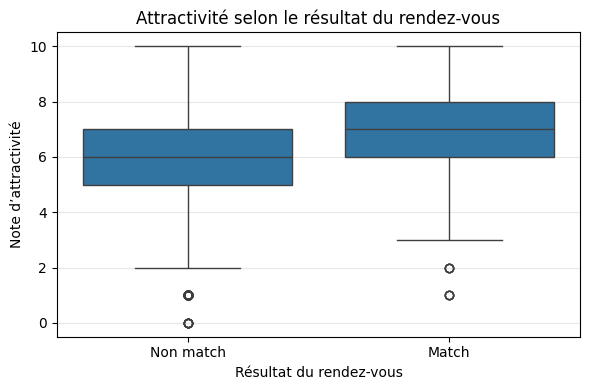

In [34]:
# Sélection des variables nécessaires
df_attr_match = df_clean[["match"] + notes_cols].dropna()

# Ajout libellé pour l'axe X
df_attr_match_plot = df_attr_match.copy()
df_attr_match_plot["match_label"] = df_attr_match_plot["match"].map({
    0: "Non match",
    1: "Match"
})

# Création du graphique
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df_attr_match_plot,
    x="match_label",
    y="attr",
    order=["Non match", "Match"]
)

plt.title("Attractivité selon le résultat du rendez-vous")
plt.xlabel("Résultat du rendez-vous")
plt.ylabel("Note d’attractivité")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


#### Distribution de l’âge des participants

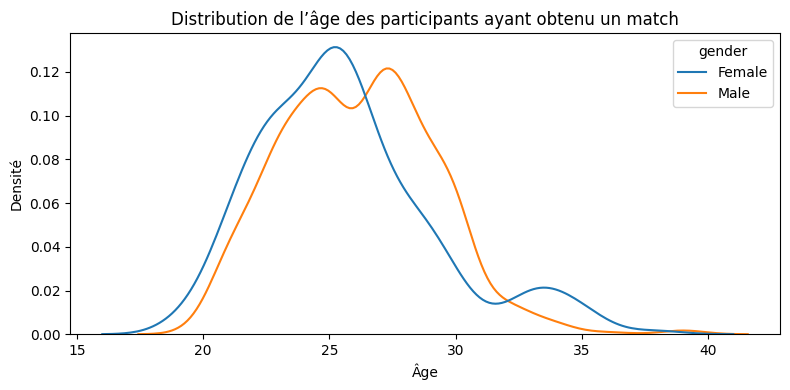

In [ ]:
# Sélection des variables nécessaires
df_age_match = df_match[["age", "gender"]].dropna()

# Création du graphique
plt.figure(figsize=(8, 4))

sns.kdeplot(
    data=df_age_match,
    x="age",
    hue="gender",
    common_norm=False
)

plt.title("Distribution de l’âge des participants ayant obtenu un match")
plt.xlabel("Âge")
plt.ylabel("Densité")
plt.tight_layout()
plt.show()

#### Taux de participants ayant obtenu un match

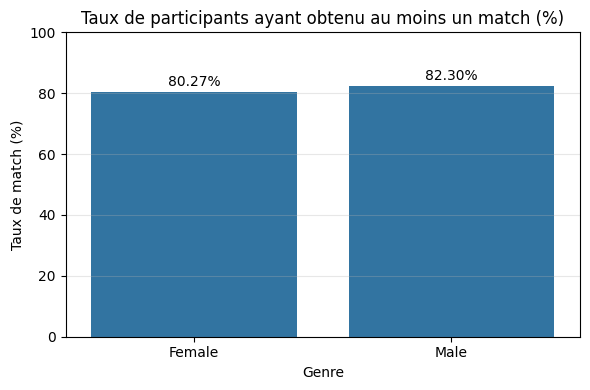

In [36]:
# Estime si une personne à une un match (1) ou non (0) 
ind_match = (
    df_clean
    .groupby(["iid", "gender"], observed=True)["match"]
    .max()
    .reset_index(name="a_match")
)

# Calcul du taux de participants ayant obtenus au moins un match
match_gender = (
    ind_match
    .groupby("gender", observed=True)["a_match"]
    .mean()
    .mul(100)
    .round(2)
    .reset_index()
)

# Renommage des colonnes
match_gender.columns = ["gender", "match_rate"]

# Défini l'ordre d'affichage
gender_order = ["Female", "Male"]

# Création du graphique
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=match_gender,
    x="gender",
    y="match_rate",
    order=gender_order
)

plt.title("Taux de participants ayant obtenu au moins un match (%)")
plt.xlabel("Genre")
plt.ylabel("Taux de match (%)")

## Ajout des annotions au-dessus des barres
for bar in ax.patches:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + 1,
        f"{h:.2f}%",
        ha="center",
        va="bottom"
    )

plt.ylim(0, 100)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


#### Matrice de corrélations

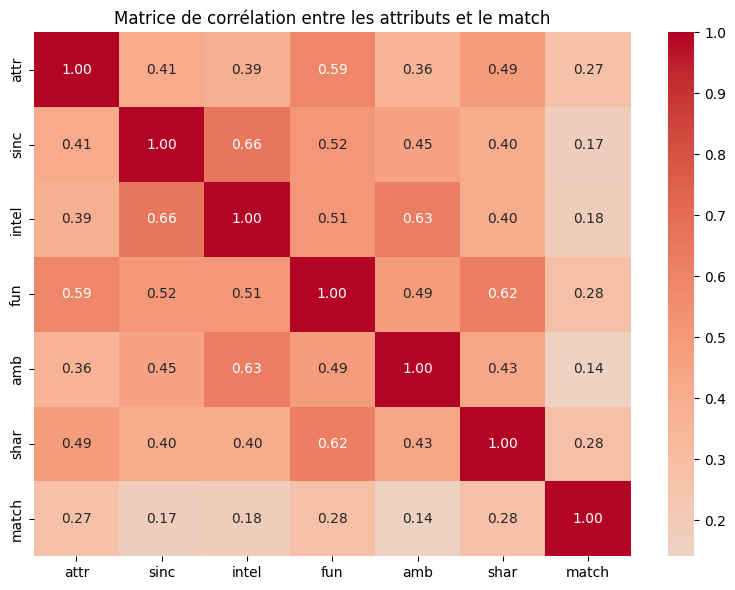

In [37]:
# Sélection des variables analysées
vars_corr = ["attr", "sinc", "intel", "fun", "amb", "shar", "match"]

# Sélection des données et suppression des valeurs manquantes
df_corr = df_clean[vars_corr].dropna()

# Calcul de la matrice de corrélation
corr_matrix = df_corr.corr()

# Création du graphique
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Matrice de corrélation entre les attributs et le match")
plt.tight_layout()
plt.show()

#### Conclusion

Si l’attractivité est le critère le plus recherché, les rencontres ayant abouti à un match présentent surtout des notes élevées en intelligence, sincérité et amusement.

L’attractivité reste toutefois déterminante, avec un écart moyen d’environ un point entre matchs et non-matchs.

La distribution des matchs selon l’âge révèle des profils différenciés : les femmes obtiennent davantage de matchs autour de 25 ans et en-deçà, tandis que les hommes présentent un pic plus marqué entre 27 et 31 ans.

Enfin, plus de 80 % des participants ont obtenu au moins un match, avec un léger avantage pour les hommes d’environ deux points.

Les corrélations entre ces attributs et l’obtention d’un match restent modérées, avec des liens légèrement plus élevés pour l’attractivité, l’amusement et les intérêts partagés.

Ces résultats confirment que le succès d’une rencontre repose sur une combinaison de facteurs, sans qu’un critère unique ne suffise à expliquer l’obtention d’un match.

### Critères désirés vs critères déterminants

#### Critères désirés (avant les rencontres)

In [38]:
# Critères désirés avant l'événement
criteres_desires = ["attr1_1", "intel1_1", "fun1_1", "sinc1_1", "amb1_1", "shar1_1"]

# Calcul des moyennes
desires_mean = (
    df_clean[criteres_desires]
    .mean()
    .reset_index()
)

# Renommage des colonnes
desires_mean.columns = ["critere", "score_desire"]

# Remplacement par des labels lisibles
desires_mean["critere"] = labels


#### Critères déterminants (comportement réel)

In [39]:
# Corrélation entre critères perçus et décision
criteres_determinants = {
    "Attractif": df_clean[["attr", "dec"]].corr().iloc[0, 1],
    "Intelligent": df_clean[["intel", "dec"]].corr().iloc[0, 1],
    "Amusant": df_clean[["fun", "dec"]].corr().iloc[0, 1],
    "Sincère": df_clean[["sinc", "dec"]].corr().iloc[0, 1],
    "Ambitieux": df_clean[["amb", "dec"]].corr().iloc[0, 1],
    "Intérêts partagés": df_clean[["shar", "dec"]].corr().iloc[0, 1],
}

# Mise en DataFrame
determinants_df = (
    pd.DataFrame.from_dict(
        criteres_determinants,
        orient="index",
        columns=["impact_reel"]
    )
    .reset_index()
)

determinants_df.columns = ["critere", "impact_reel"]


#### Comparaison entre les deux

In [40]:
# Fusion des deux approches
comparaison_criteres = desires_mean.merge(
    determinants_df,
    on="critere"
)

comparaison_criteres


,critere,score_desire,impact_reel
0,Attractif,23.982565,0.480372
1,Sincère,20.559999,0.213461
2,Intelligent,17.352206,0.226879
3,Amusant,17.298112,0.415028
4,Ambitieux,9.744158,0.183014
5,Intérêts partagés,11.254515,0.410090


#### Visualisation des résultats

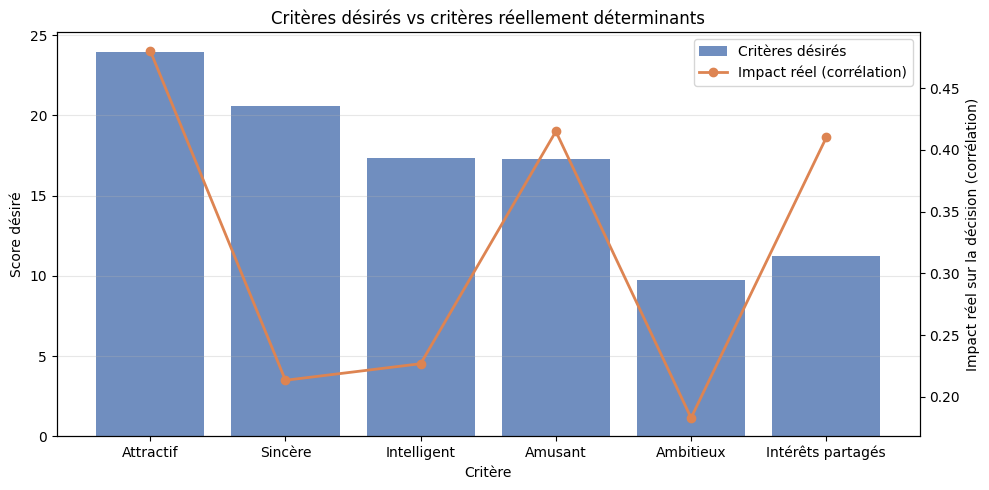

In [41]:
# Ordre des critères
x = comparaison_criteres["critere"]

# Création de la figure et de l'axe principal
fig, ax1 = plt.subplots(figsize=(10, 5))

# Axe Y principal : critères désirés (barres)
ax1.bar(
    x,
    comparaison_criteres["score_desire"],
    color="#4C72B0",
    alpha=0.8,
    label="Critères désirés"
)

ax1.set_xlabel("Critère")
ax1.set_ylabel("Score désiré")
ax1.tick_params(axis="y")

# Axe Y secondaire : impact réel (ligne)
ax2 = ax1.twinx()

ax2.plot(
    x,
    comparaison_criteres["impact_reel"],
    color="#DD8452",
    marker="o",
    linewidth=2,
    label="Impact réel (corrélation)"
)

ax2.set_ylabel("Impact réel sur la décision (corrélation)")
ax2.tick_params(axis="y")

plt.title("Critères désirés vs critères réellement déterminants")

# Légende combinée
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="upper right"
)

ax1.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


#### Conclusion

Les critères déclarés par les participants ne correspondent pas entièrement aux facteurs qui influencent réellement la décision.

Si la sincérité et l’intelligence sont fortement valorisées a priori, l’attractivité, l’amusement et les intérêts partagés ont un impact plus déterminant sur l’obtention d’un match.

Ce décalage met en évidence une différence entre critères souhaités et mécanismes réels de sélection.

### Conclusion EDA

Cette analyse met en évidence un écart clair entre les critères que les participants déclarent rechercher et ceux qui influencent réellement la décision de match.

Si l’attractivité est perçue comme un critère central, les rencontres ayant abouti à un match se distinguent surtout par des évaluations élevées en intelligence, sincérité et amusement, suggérant que la qualité de l’interaction joue un rôle clé dans la décision finale.

Les différences observées selon le genre, l’âge et l’origine ethnique existent mais restent modérées, indiquant qu’aucun facteur isolé ne suffit à expliquer le succès d’une rencontre.

Ces résultats suggèrent que les mécanismes de matching pourraient gagner à mieux intégrer les critères réellement déterminants observés lors des interactions, plutôt que de se fonder uniquement sur les préférences déclarées.

Enfin, ces conclusions doivent être interprétées avec prudence, dans un contexte spécifique de speed dating, distinct de celui des applications de rencontre modernes.

## Synthèse visuelle

### Qui sont les participants ?
Panel étudié

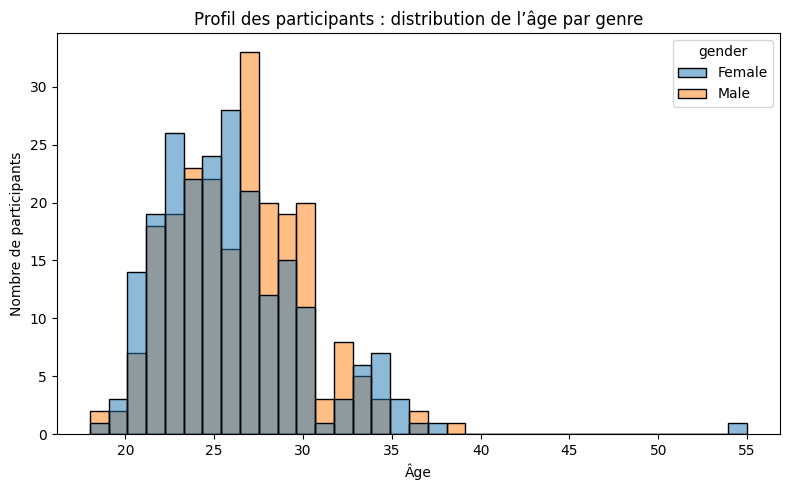

In [51]:
plt.figure(figsize=(8, 5))

sns.histplot(
    data=df_individus,
    x="age",
    hue="gender",
    bins=35,
    multiple="layer", 
    stat="count",     
    alpha=0.5
)

plt.title("Profil des participants : distribution de l’âge par genre")
plt.xlabel("Âge")
plt.ylabel("Nombre de participants")
plt.tight_layout()
plt.show()

### Les hommes et les femmes recherchent-ils la même chose ?
Différences selon les genres

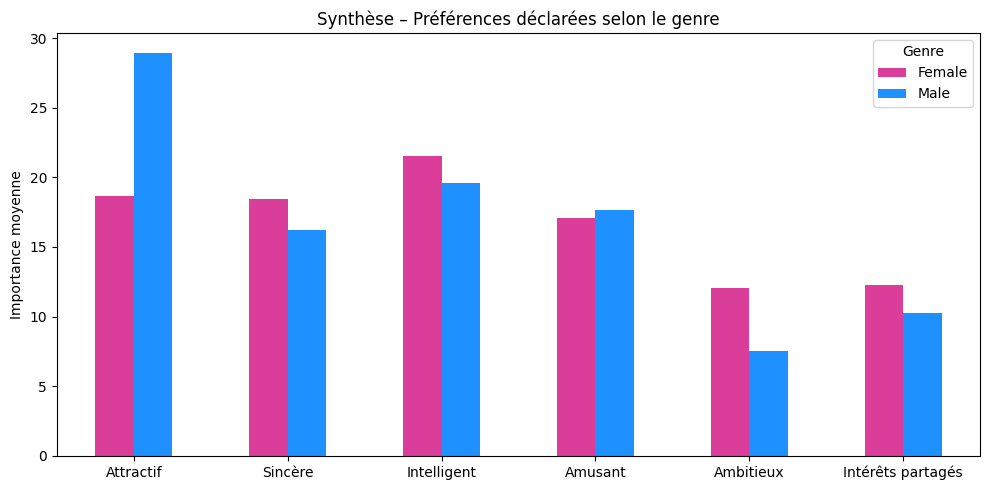

In [43]:
df_pref_mean.plot(
    kind="bar",
    figsize=(10, 5),
    color=["#DB3E9A", "#1E90FF"]
)

plt.title("Synthèse – Préférences déclarées selon le genre")
plt.ylabel("Importance moyenne")
plt.xticks(rotation=0)
plt.legend(title="Genre")
plt.tight_layout()
plt.show()


### L’origine ethnique influence-t-elle le taux de match ?
Différences selon les origines ethniques

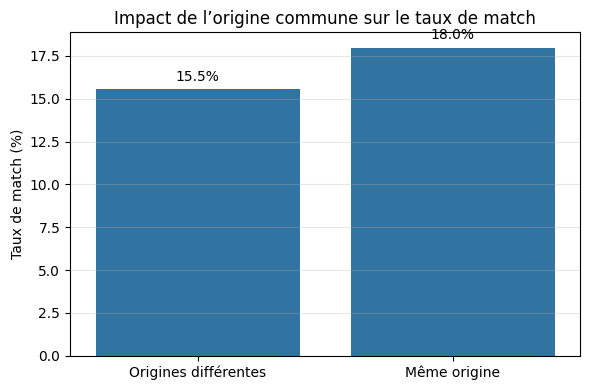

In [44]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=match_by_samerace,
    x="samerace_label",
    y="match"
)

plt.title("Impact de l’origine commune sur le taux de match")
plt.ylabel("Taux de match (%)")
plt.xlabel("")

for bar in ax.patches:
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        h + 0.5,
        f"{h:.1f}%",
        ha="center"
    )

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### Qu’est-ce qui distingue un match d’un non-match ?
Focus sur les matchs uniquement

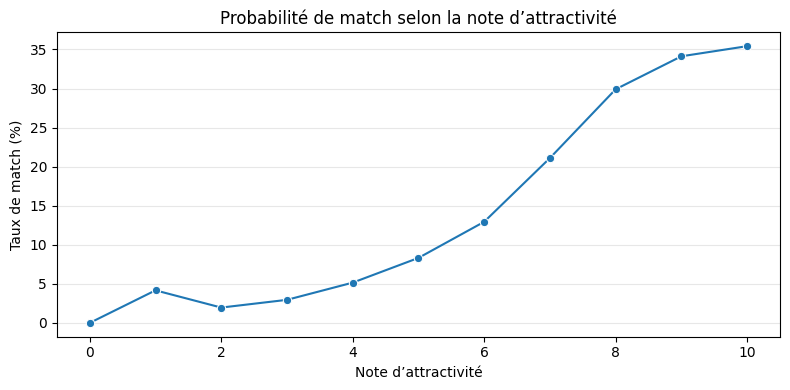

In [54]:
# Sélection simple
df_plot = df_clean[["attr", "match"]].dropna()

# Arrondi / conversion en entier
df_plot["attr_int"] = df_plot["attr"].round().astype(int)

# Calcul du taux de match par note d’attractivité
match_rate_by_attr = (
    df_plot
    .groupby("attr_int", observed=True)["match"]
    .mean()
    .mul(100)
    .reset_index()
)

# Graphique
plt.figure(figsize=(8, 4))
sns.lineplot(
    data=match_rate_by_attr,
    x="attr_int",
    y="match",
    marker="o"
)

plt.title("Probabilité de match selon la note d’attractivité")
plt.xlabel("Note d’attractivité")
plt.ylabel("Taux de match (%)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### Ce que l’on dit vouloir est-il ce qui influence vraiment la décision ?
Critères désirés vs critères déterminants

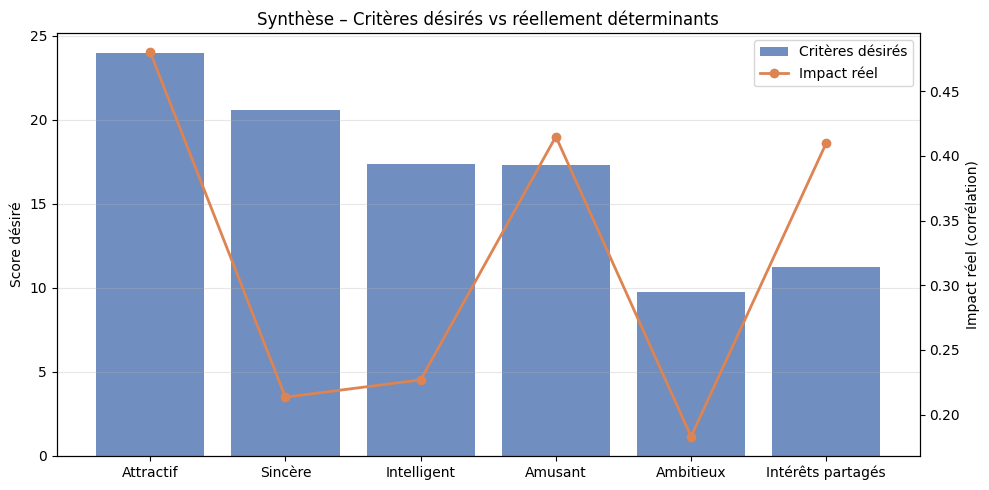

In [46]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(
    x,
    comparaison_criteres["score_desire"],
    color="#4C72B0",
    alpha=0.8,
    label="Critères désirés"
)

ax2 = ax1.twinx()
ax2.plot(
    x,
    comparaison_criteres["impact_reel"],
    color="#DD8452",
    marker="o",
    linewidth=2,
    label="Impact réel"
)

ax1.set_ylabel("Score désiré")
ax2.set_ylabel("Impact réel (corrélation)")
plt.title("Synthèse – Critères désirés vs réellement déterminants")

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

ax1.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()